This command is required to display the plots inline:

In [1]:
%matplotlib inline

Import the tools for the exercise:

In [2]:
import numpy
from pandas import *
import pandasql
from ggplot import *

And now import the dataset as a ``pandas`` dataframe:

In [3]:
turnstile_data = pandas.read_csv('data/turnstile_data_master_with_weather.csv')
turnstile_data.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)

In [4]:
print turnstile_data.columns

Index([u'unnamed:_0', u'unit', u'daten', u'timen', u'hour', u'descn',
       u'entriesn_hourly', u'exitsn_hourly', u'maxpressurei', u'maxdewpti',
       u'mindewpti', u'minpressurei', u'meandewpti', u'meanpressurei', u'fog',
       u'rain', u'meanwindspdi', u'mintempi', u'meantempi', u'maxtempi',
       u'precipi', u'thunder'],
      dtype='object')


Let's have a look at the data and display the most import ones:

In [5]:
print turnstile_data[['unit', 'daten', 'timen', 'precipi', 'entriesn_hourly']]

        unit       daten     timen  precipi  entriesn_hourly
0       R001  2011-05-01  01:00:00     0.00                0
1       R001  2011-05-01  05:00:00     0.00              217
2       R001  2011-05-01  09:00:00     0.00              890
3       R001  2011-05-01  13:00:00     0.00             2451
4       R001  2011-05-01  17:00:00     0.00             4400
5       R001  2011-05-01  21:00:00     0.00             3372
6       R002  2011-05-01  01:00:00     0.00                0
7       R002  2011-05-01  05:00:00     0.00               42
8       R002  2011-05-01  09:00:00     0.00               50
9       R002  2011-05-01  13:00:00     0.00              316
10      R002  2011-05-01  17:00:00     0.00              633
11      R002  2011-05-01  21:00:00     0.00              639
12      R003  2011-05-01  00:00:00     0.00                0
13      R003  2011-05-01  04:00:00     0.00                0
14      R003  2011-05-01  12:00:00     0.00                0
15      R003  2011-05-01

In [6]:
print numpy.mean(turnstile_data[turnstile_data['daten'] == '2011-05-30']['precipi'])

0.29


To be noticed, the precipitation value is the same for all stations for a given day. The plot of the precipitation by number of entries gives a cloud of points, that does not make think about a potential regression.

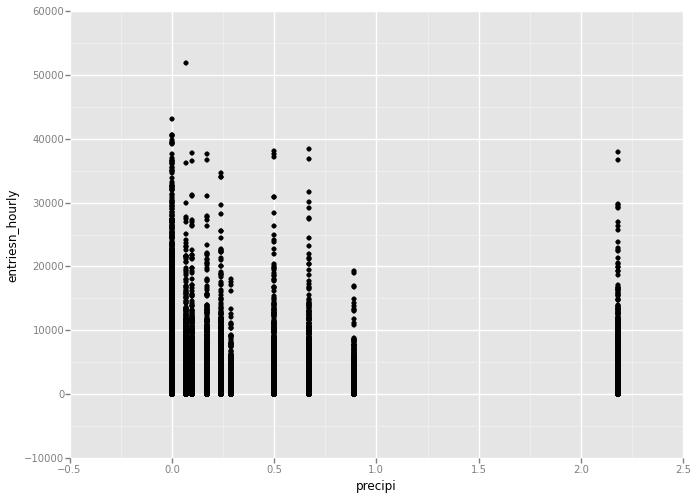

<ggplot: (276518173)>


In [7]:
plot = ggplot(aes('precipi', 'entriesn_hourly'), turnstile_data) + geom_point()
print plot

I would feel better to work on the total number of entries by day, since the precipitation is also given by day.

In [8]:
q = """
select daten, precipi, sum(entriesn_hourly)
from turnstile_data
group by daten, precipi;
"""
turnstile_data_aggregate = pandasql.sqldf(q.lower(), locals())

In [9]:
print turnstile_data_aggregate

         daten  precipi  sum(entriesn_hourly)
0   2011-05-01     0.00               2370432
1   2011-05-02     0.00               5317143
2   2011-05-03     0.00               5840327
3   2011-05-04     0.50               5836427
4   2011-05-05     0.00               5900352
5   2011-05-06     0.00               5862195
6   2011-05-07     0.00               3530107
7   2011-05-08     0.00               2683954
8   2011-05-09     0.00               5346657
9   2011-05-10     0.00               5767646
10  2011-05-11     0.00               5894916
11  2011-05-12     0.00               5907349
12  2011-05-13     0.00               5863115
13  2011-05-14     0.00               3537323
14  2011-05-15     0.89               2685406
15  2011-05-16     0.17               5428740
16  2011-05-17     0.67               5669840
17  2011-05-18     2.18               5866031
18  2011-05-19     0.07               5811475
19  2011-05-20     0.24               5792009
20  2011-05-21     0.07           

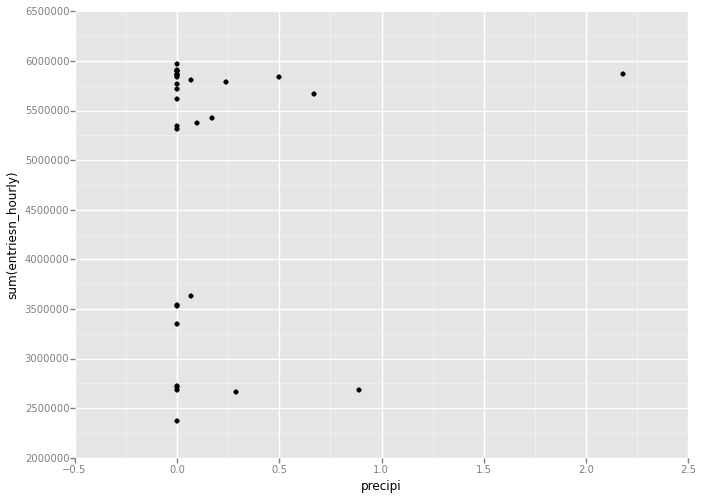

<ggplot: (283185325)>


In [11]:
plot = ggplot(aes('precipi', 'sum(entriesn_hourly)'), turnstile_data_aggregate) + geom_point()
print plot